In [4]:
import pandas as pd
import numpy as np
import torch
from data_reader import read_interaction_matrix
R = read_interaction_matrix()
from tqdm import tqdm

n_users, n_items = R.shape
n_latent = 64
r = 0.001

# learning rate
INIT_LR = 0.05
END_LR = 0.0001
n_epochs = 750

# error check steps
erc_step = 100
# min error threshold
eth = 1e-4

rng = np.random.default_rng(seed=1234)
scale = 1./n_latent
Q0 = rng.normal(scale=scale, size=(n_users, n_latent))
P0 = rng.normal(scale=scale, size=(n_items, n_latent))

def E(R, P, Q):
    return np.abs(R - Q@P.T).sum() + r*((Q*Q).sum() + (P*P).sum())

def LR(epoch, warmup):
    s = warmup / n_epochs
    x = (epoch - n_epochs)/n_epochs
    
    if epoch >= warmup:
        x = x - s
        y = ((1 + x))
        
        # y = (n_epochs*(s-1) + 1/(1 - s))*x + n_epochs*(1-s)
        # y = y * n_epochs / (n_epochs - s*n_epochs)
    else:
        x += 1
        y = (-2./s)*(x**2) + 2*s
        
    # f = lambda e : ((e/n_epochs)) * (((e/5 + (1-stop_warmup)*n_epochs)/n_epochs)**5)
    # y = f(2/3*n_epochs + (-n_epochs + epoch)*3.)
    # if epoch < stop_warmup:
    #     x *= ((-epoch + stop_warmup//2)*3/n_epochs)**3
    #     if epoch % 20 == 0:
    #         print("warmup")
    # z = lambda x : (x - 1/3)**(0.3) * np.exp(-x**(0.8))
    
    lr = INIT_LR - (INIT_LR-END_LR) * y
    return lr


0.01 1e-09


2it [00:00,  4.83it/s]

err: 2.30e+04, lr: 0.0010000


110it [00:03, 41.56it/s]

err: 1.35e+04, lr: 0.0056808


207it [00:06, 30.70it/s]

err: 1.32e+04, lr: 0.0031326


308it [00:09, 34.24it/s]

err: 1.31e+04, lr: 0.0017274


409it [00:12, 29.64it/s]

err: 1.31e+04, lr: 0.0009525


507it [00:15, 36.22it/s]

err: 1.31e+04, lr: 0.0005252


510it [00:15, 33.19it/s]


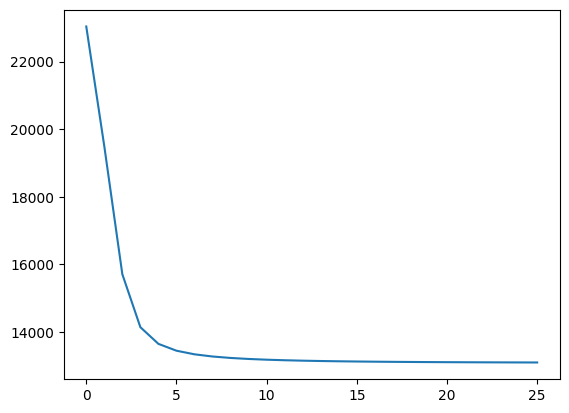

In [27]:
from data_reader import read_interaction_matrix
R = read_interaction_matrix()

from mf import matrix_factorization
from matplotlib import pyplot as plt

def get_errors(logs):
    errors = [log[0] for log in logs]
    return errors

q, p, err, logs = matrix_factorization(R, lr=(1e-2, 1e-9), n_epochs=510, reg=0.001, n_latent=64)
errors = get_errors(logs)
plt.plot(errors)

In [20]:
import numpy as np
S = (q @ p.T)
S.sum(), R.sum()

(22742.865602135807, 23038.0)

In [21]:
logs[200][1], logs[100][1]

IndexError: list index out of range

In [16]:
S[R.nonzero()]

array([ 0.11375243, -0.00737023, -0.01555766, ..., -0.01293716,
        0.01426934, -0.00981844])

In [4]:
from mf import error

print(error(R, q, p, 0.001))

13290.584071405661


In [22]:
S = (q@p.T)

def f(f):
    i = 5
    i += 1 if f < 0 else 0
    return str(f)[:i]

[f(x) for x in [S[0,6], S[0,7], S.mean(), S.min(), S.max()]]

['-0.091', '0.026', '0.023', '-0.498', '1.505']

In [25]:
S[R.nonzero()].mean(), (S - S * R).mean()

(0.43739399609746105, 0.012895464071228945)

In [4]:
from mf import init_pq

q, p = init_pq(*R.shape, 64)

In [3]:
import numpy as np

rng = np.random.default_rng(seed=1234)

rng.choice(500, (3,2), replace=False)

array([[6, 1],
       [3, 9],
       [5, 4]])

In [2]:
R.nonzero()[0].shape[0]

23038

In [10]:
import numpy as np
np.ones((733*3)) - R[[1,2,3]]

ValueError: operands could not be broadcast together with shapes (2199,) (3,733) 

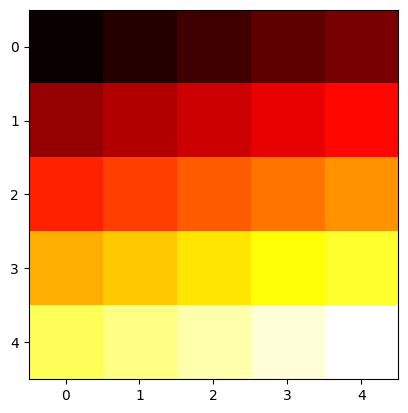

In [3]:
import matplotlib.pyplot as plt
import numpy as np

a = np.random.random((16, 16))

import matplotlib.pyplot as plt
plt.imshow(np.arange(25).reshape((5,5)), cmap='hot', interpolation='nearest')
plt.show()

In [6]:
a[0,0], a[0,1]

(0.7872524803128215, 0.21563029234104714)

In [2]:
a

NameError: name 'a' is not defined

In [8]:
import numpy as np
a = np.arange(64).reshape((8,8))
i = np.arange(8)
j = np.random.choice(8, 8, False)
   
b = a.copy()
b[j] = a[i]

c = b.copy()
c[i] = b[j]

a, b, c

(array([[ 0,  1,  2,  3,  4,  5,  6,  7],
        [ 8,  9, 10, 11, 12, 13, 14, 15],
        [16, 17, 18, 19, 20, 21, 22, 23],
        [24, 25, 26, 27, 28, 29, 30, 31],
        [32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47],
        [48, 49, 50, 51, 52, 53, 54, 55],
        [56, 57, 58, 59, 60, 61, 62, 63]]),
 array([[ 7,  3,  5,  0,  2,  1,  6,  4],
        [15, 11, 13,  8, 10,  9, 14, 12],
        [23, 19, 21, 16, 18, 17, 22, 20],
        [31, 27, 29, 24, 26, 25, 30, 28],
        [39, 35, 37, 32, 34, 33, 38, 36],
        [47, 43, 45, 40, 42, 41, 46, 44],
        [55, 51, 53, 48, 50, 49, 54, 52],
        [63, 59, 61, 56, 58, 57, 62, 60]]),
 array([[ 0,  1,  2,  3,  4,  5,  6,  7],
        [ 8,  9, 10, 11, 12, 13, 14, 15],
        [16, 17, 18, 19, 20, 21, 22, 23],
        [24, 25, 26, 27, 28, 29, 30, 31],
        [32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47],
        [48, 49, 50, 51, 52, 53, 54, 55],
        [56, 57, 58, 59, 60, 6

In [1]:
import numpy as np
a = np.arange(64).reshape((8,8))

from mf import shuffle, revert

j = shuffle(a)
b = a.copy()
revert(a, j)
b, a

(array([[48, 49, 50, 51, 52, 53, 54, 55],
        [40, 41, 42, 43, 44, 45, 46, 47],
        [56, 57, 58, 59, 60, 61, 62, 63],
        [ 8,  9, 10, 11, 12, 13, 14, 15],
        [16, 17, 18, 19, 20, 21, 22, 23],
        [ 0,  1,  2,  3,  4,  5,  6,  7],
        [24, 25, 26, 27, 28, 29, 30, 31],
        [32, 33, 34, 35, 36, 37, 38, 39]]),
 array([[ 0,  1,  2,  3,  4,  5,  6,  7],
        [ 8,  9, 10, 11, 12, 13, 14, 15],
        [16, 17, 18, 19, 20, 21, 22, 23],
        [24, 25, 26, 27, 28, 29, 30, 31],
        [32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47],
        [48, 49, 50, 51, 52, 53, 54, 55],
        [56, 57, 58, 59, 60, 61, 62, 63]]))

In [11]:
np.mean((a, a), axis=0)

array([[ 0.,  1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.,  9.],
       [10., 11., 12., 13., 14.],
       [15., 16., 17., 18., 19.],
       [20., 21., 22., 23., 24.]])

In [4]:
a

NameError: name 'a' is not defined